# **Result statistics**

In [1]:
#import
import os
import sys
import random
import torch
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from tqdm import tqdm

In [2]:
root_dir = '/home/ids/saimeur-22/Projects/Gen-Ai/Detectors/UniversalFakeDetect-main'
result_dir_from_root = 'result/Davis-480p'
result_dir = os.path.join(root_dir, result_dir_from_root)

print(f"Result directory : {result_dir}")

Result directory : /home/ids/saimeur-22/Projects/Gen-Ai/Detectors/UniversalFakeDetect-main/result/Davis-480p


In [3]:
dataset_list_dir = [dir for dir in os.listdir(result_dir) if os.path.isdir(os.path.join(result_dir, dir))]

for dir in dataset_list_dir:
    num_real_video = len(os.listdir(os.path.join(result_dir, dir, '0_real')))
    num_fake_video = len(os.listdir(os.path.join(result_dir, dir, '1_fake')))
    print("Number of dataset : ", len(dataset_list_dir))
    print(f"Dataset name : {dir}, number of real videos : {num_real_video}, number of fake videos : {num_fake_video}")

Number of dataset :  4
Dataset name : Davis-2017-480p-DiffuEraser, number of real videos : 90, number of fake videos : 90
Number of dataset :  4
Dataset name : Davis-2016-480p-DiffuEraser, number of real videos : 50, number of fake videos : 50
Number of dataset :  4
Dataset name : Davis-2017-480p-Propainter, number of real videos : 90, number of fake videos : 89
Number of dataset :  4
Dataset name : Davis-2016-480p-Propainter, number of real videos : 50, number of fake videos : 50


## **Ploting some results**

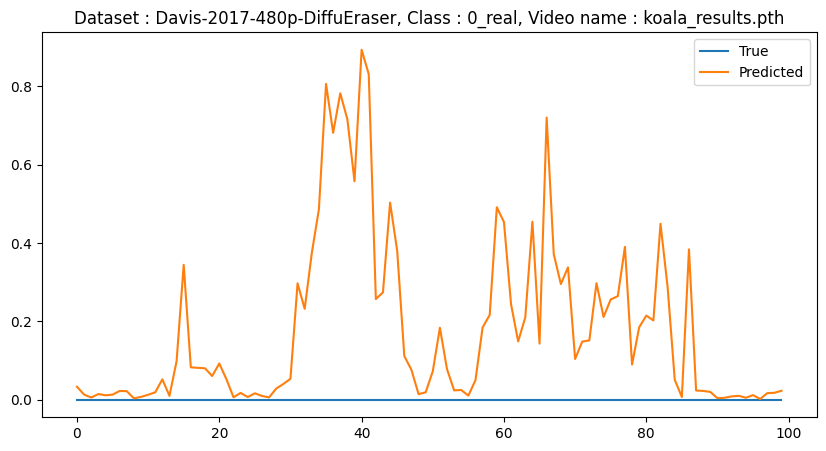

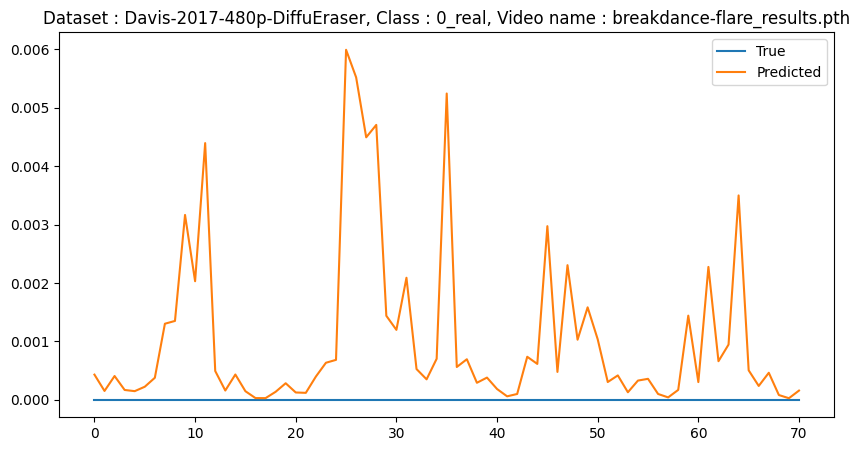

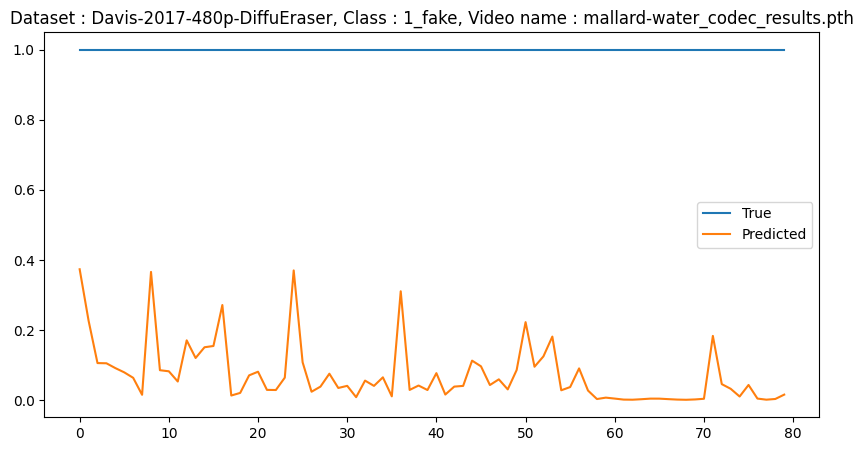

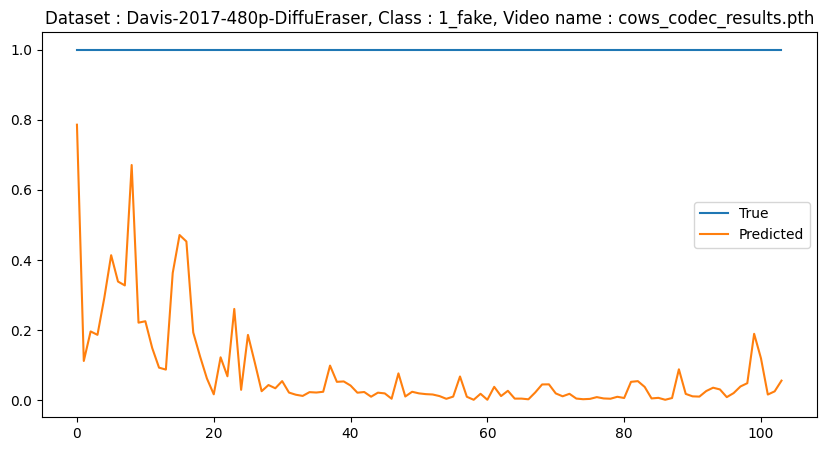

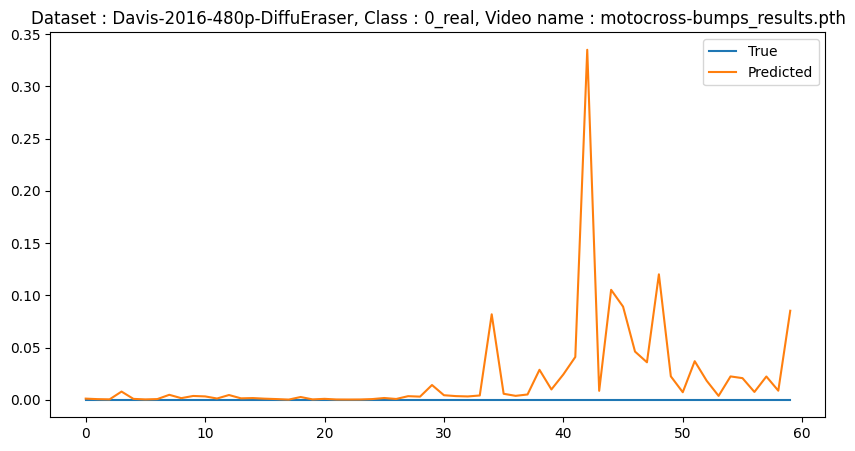

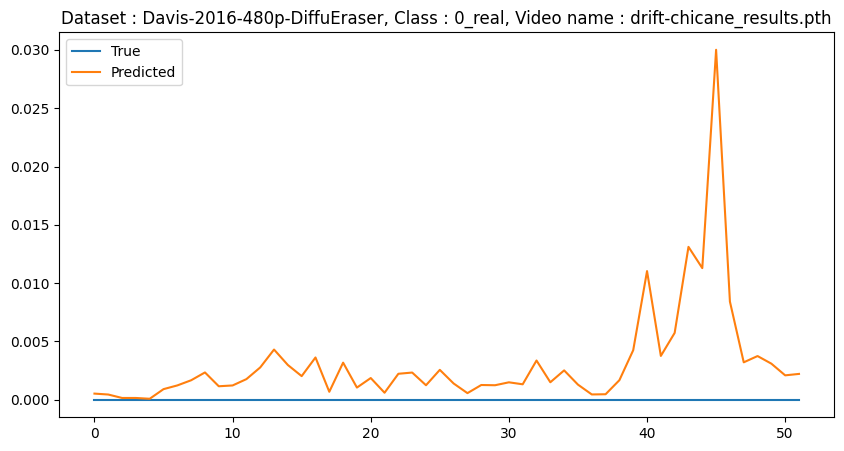

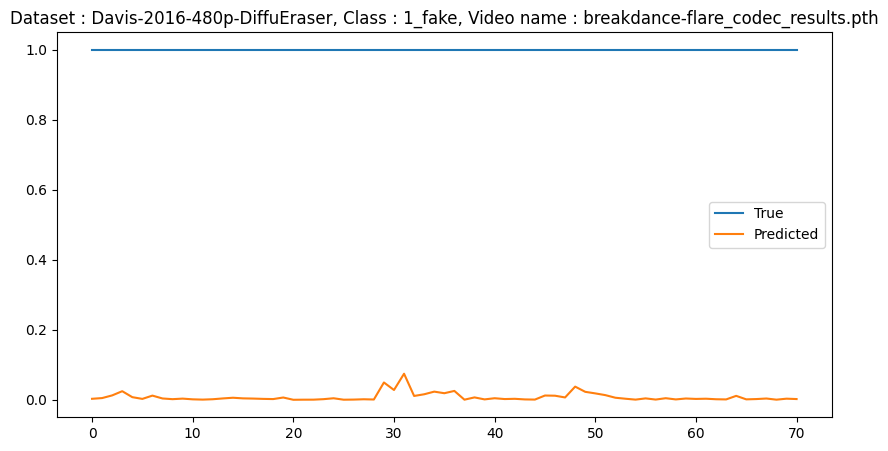

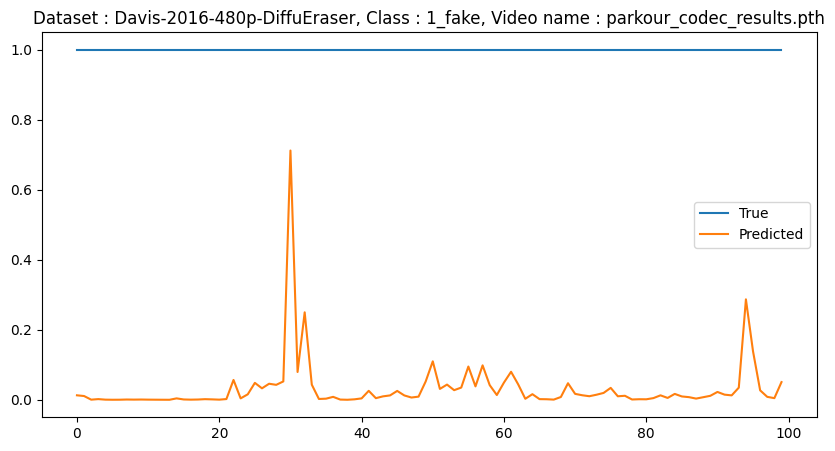

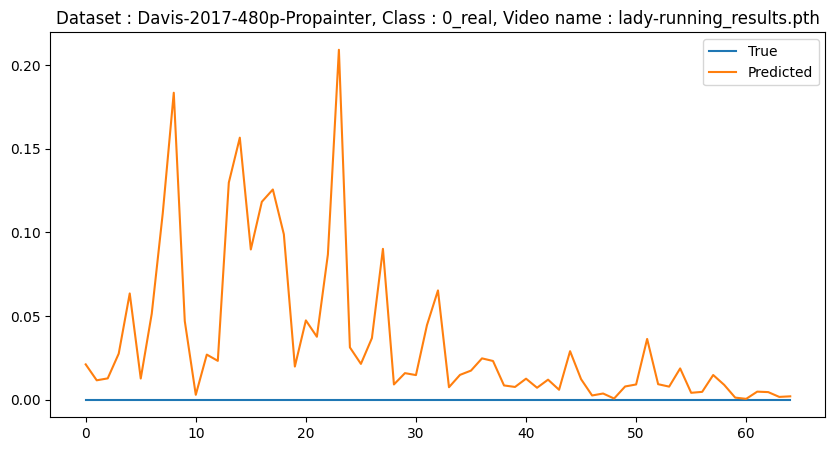

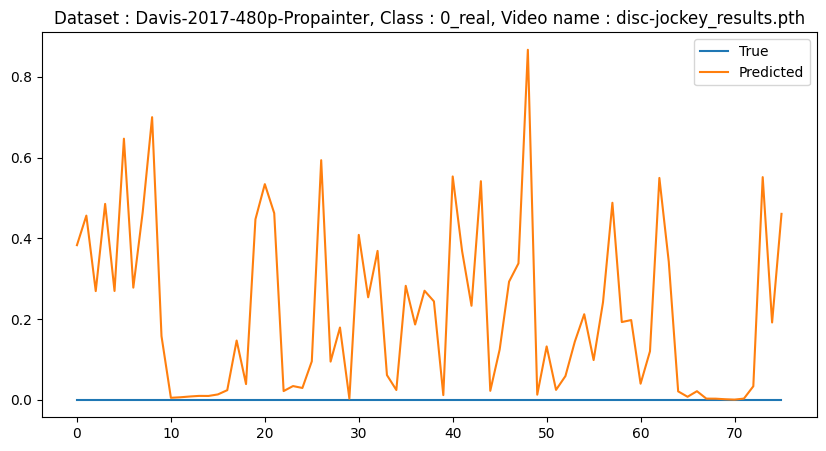

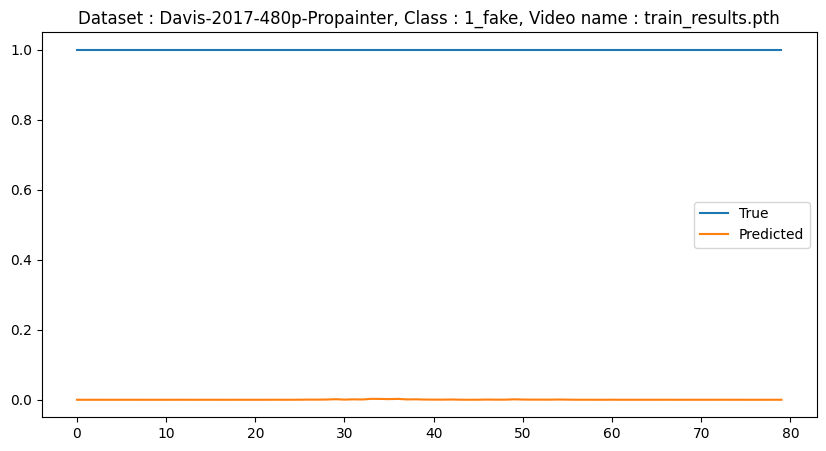

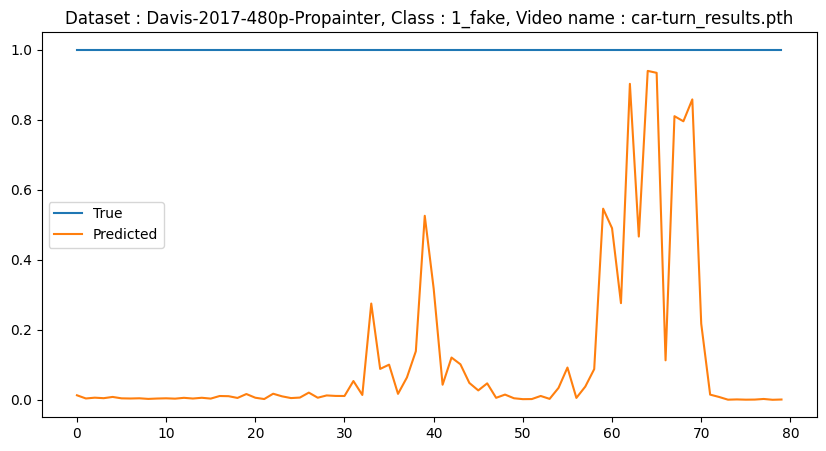

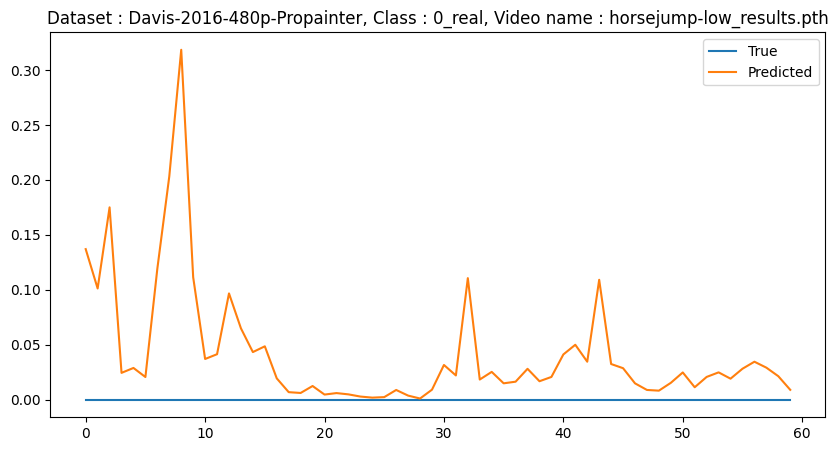

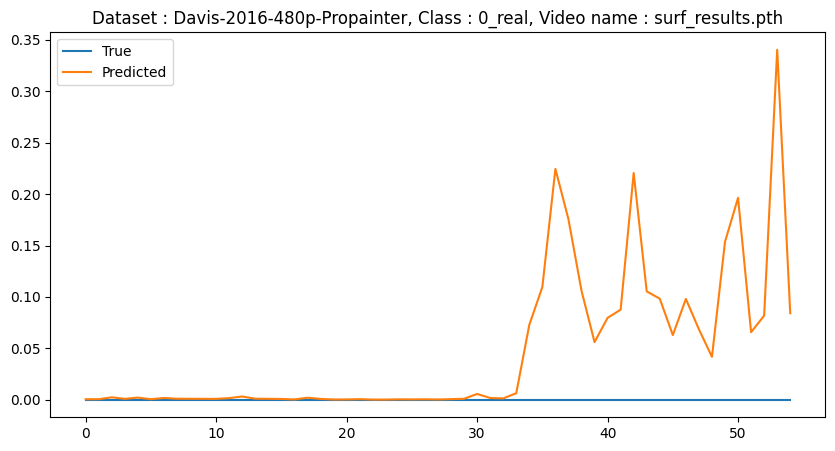

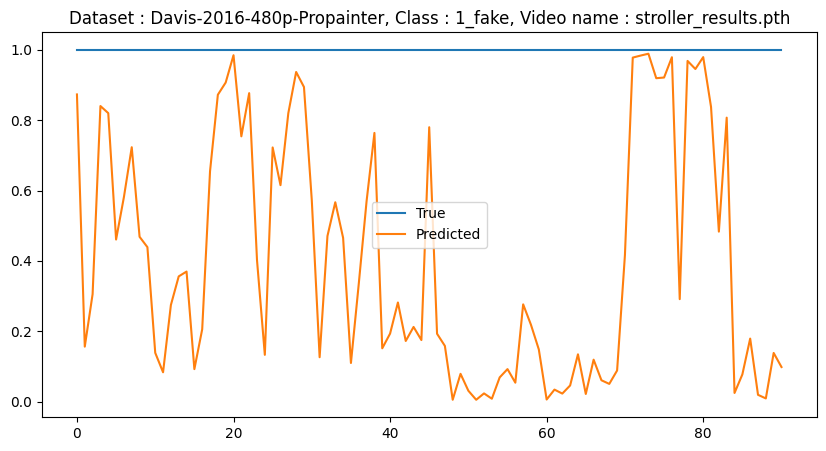

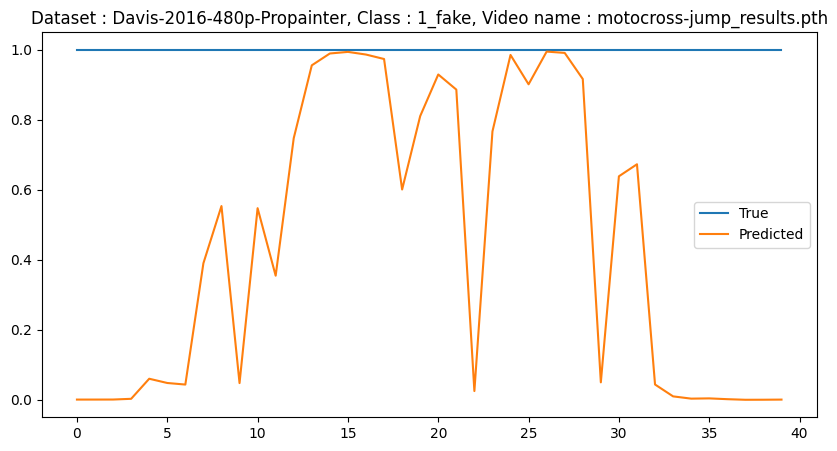

In [8]:
max_number_dataset = -1
max_number_video = 2

for dir in dataset_list_dir:
    for video_class in ['0_real', '1_fake']:
        files = os.listdir(os.path.join(result_dir, dir, video_class))
        num_of_videos = min(len(files), max_number_video)
        list_of_videos = random.sample(files, num_of_videos)
        for video in list_of_videos:
            #print(f"\nDataset : {dir}, Class : {video_class}, Video name : {video}")
            loaded_tensor = torch.load(os.path.join(result_dir, dir, video_class, video))
            #print(f"Loaded tensor shape : {loaded_tensor.shape}")
            y_true, y_pred = loaded_tensor[0], loaded_tensor[1]

            # Plotting
            plt.figure(figsize=(10, 5))
            plt.plot(y_true, label='True')
            plt.plot(y_pred, label='Predicted')
            plt.legend()
            plt.title(f"Dataset : {dir}, Class : {video_class}, Video name : {video}")
            plt.show()
        


In [9]:
# mean and std

for dir in dataset_list_dir:
    stats = {}
    for video_class in ['0_real', '1_fake']:
        files = os.listdir(os.path.join(result_dir, dir, video_class))
        stats[video_class] = {'mean': 0, 'std': 0}
        avg = []
        for video in files:
            loaded_tensor = torch.load(os.path.join(result_dir, dir, video_class, video))
            y_true, y_pred = loaded_tensor[0], loaded_tensor[1]
            avg.append(y_pred.mean())
        avg = torch.tensor(avg)
        stats[video_class]['mean'] = avg.mean().item()
        stats[video_class]['std'] = avg.std().item()
    
    #use pandas to print the stats
    print(f"Dataset : {dir}")
    df = pd.DataFrame(stats)
    print(df)
    print("\n")
            

Dataset : Davis-2017-480p-DiffuEraser
        0_real    1_fake
mean  0.032961  0.129420
std   0.056284  0.163117


Dataset : Davis-2016-480p-DiffuEraser
        0_real    1_fake
mean  0.035266  0.166528
std   0.061548  0.172458


Dataset : Davis-2017-480p-Propainter
        0_real    1_fake
mean  0.032961  0.139524
std   0.056284  0.182023


Dataset : Davis-2016-480p-Propainter
        0_real    1_fake
mean  0.035266  0.204625
std   0.061548  0.226109




## **Dataset 2**

In [10]:
root_dir = '/home/ids/saimeur-22/Projects/Gen-Ai/Detectors/UniversalFakeDetect-main'
result_dir_from_root = 'result/Davis-480p_resize'
result_dir = os.path.join(root_dir, result_dir_from_root)

print(f"Result directory : {result_dir}")

Result directory : /home/ids/saimeur-22/Projects/Gen-Ai/Detectors/UniversalFakeDetect-main/result/Davis-480p_resize


In [11]:
dataset_list_dir = [dir for dir in os.listdir(result_dir) if os.path.isdir(os.path.join(result_dir, dir))]

for dir in dataset_list_dir:
    num_real_video = len(os.listdir(os.path.join(result_dir, dir, '0_real')))
    num_fake_video = len(os.listdir(os.path.join(result_dir, dir, '1_fake')))
    print("Number of dataset : ", len(dataset_list_dir))
    print(f"Dataset name : {dir}, number of real videos : {num_real_video}, number of fake videos : {num_fake_video}")

Number of dataset :  4
Dataset name : Davis-2016-480p-Propainter, number of real videos : 50, number of fake videos : 50
Number of dataset :  4
Dataset name : Davis-2017-480p-Propainter, number of real videos : 90, number of fake videos : 89
Number of dataset :  4
Dataset name : Davis-2017-480p-DiffuEraser, number of real videos : 90, number of fake videos : 90
Number of dataset :  4
Dataset name : Davis-2016-480p-DiffuEraser, number of real videos : 50, number of fake videos : 50


## **Ploting some results**

In [ ]:
# mean and std

for dir in dataset_list_dir:
    stats = {}
    for video_class in ['0_real', '1_fake']:
        files = os.listdir(os.path.join(result_dir, dir, video_class))
        stats[video_class] = {'mean': 0, 'std': 0}
        avg = []
        for video in files:
            loaded_tensor = torch.load(os.path.join(result_dir, dir, video_class, video))
            y_true, y_pred = loaded_tensor[0], loaded_tensor[1]
            avg.append(y_pred.mean())
        avg = torch.tensor(avg)
        stats[video_class]['mean'] = avg.mean().item()
        stats[video_class]['std'] = avg.std().item()
    
    #use pandas to print the stats
    print(f"Dataset : {dir}")
    df = pd.DataFrame(stats)
    print(df)
    print("\n")

Dataset : Davis-2016-480p-Propainter
        0_real    1_fake
mean  0.026101  0.100143
std   0.048797  0.116592


Dataset : Davis-2017-480p-Propainter
        0_real    1_fake
mean  0.033920  0.101077
std   0.074896  0.164099


Dataset : Davis-2017-480p-DiffuEraser
        0_real    1_fake
mean  0.033920  0.046470
std   0.074896  0.103338


Dataset : Davis-2016-480p-DiffuEraser
        0_real    1_fake
mean  0.026101  0.037420
std   0.048797  0.060939




## **Dataset 3**

In [14]:
root_dir = '/home/ids/saimeur-22/Projects/Gen-Ai/Detectors/UniversalFakeDetect-main'
result_dir_from_root = 'result/Davis-480p_resize_crop'
result_dir = os.path.join(root_dir, result_dir_from_root)

print(f"Result directory : {result_dir}")

Result directory : /home/ids/saimeur-22/Projects/Gen-Ai/Detectors/UniversalFakeDetect-main/result/Davis-480p_resize_crop


In [15]:
dataset_list_dir = [dir for dir in os.listdir(result_dir) if os.path.isdir(os.path.join(result_dir, dir))]

for dir in dataset_list_dir:
    num_real_video = len(os.listdir(os.path.join(result_dir, dir, '0_real')))
    num_fake_video = len(os.listdir(os.path.join(result_dir, dir, '1_fake')))
    print("Number of dataset : ", len(dataset_list_dir))
    print(f"Dataset name : {dir}, number of real videos : {num_real_video}, number of fake videos : {num_fake_video}")

Number of dataset :  4
Dataset name : Davis-2017-480p-Propainter, number of real videos : 90, number of fake videos : 89
Number of dataset :  4
Dataset name : Davis-2016-480p-Propainter, number of real videos : 50, number of fake videos : 50
Number of dataset :  4
Dataset name : Davis-2017-480p-DiffuEraser, number of real videos : 90, number of fake videos : 90
Number of dataset :  4
Dataset name : Davis-2016-480p-DiffuEraser, number of real videos : 50, number of fake videos : 50


## **Ploting some results**

In [16]:
# mean and std

for dir in dataset_list_dir:
    stats = {}
    for video_class in ['0_real', '1_fake']:
        files = os.listdir(os.path.join(result_dir, dir, video_class))
        stats[video_class] = {'mean': 0, 'std': 0}
        avg = []
        for video in files:
            loaded_tensor = torch.load(os.path.join(result_dir, dir, video_class, video))
            y_true, y_pred = loaded_tensor[0], loaded_tensor[1]
            avg.append(y_pred.mean())
        avg = torch.tensor(avg)
        stats[video_class]['mean'] = avg.mean().item()
        stats[video_class]['std'] = avg.std().item()
    
    #use pandas to print the stats
    print(f"Dataset : {dir}")
    df = pd.DataFrame(stats)
    print(df)
    print("\n")
            

Dataset : Davis-2017-480p-Propainter
        0_real    1_fake
mean  0.005386  0.038868
std   0.012907  0.107990


Dataset : Davis-2016-480p-Propainter
        0_real    1_fake
mean  0.005331  0.049843
std   0.011064  0.079133


Dataset : Davis-2017-480p-DiffuEraser
        0_real    1_fake
mean  0.005386  0.015054
std   0.012907  0.034975


Dataset : Davis-2016-480p-DiffuEraser
        0_real    1_fake
mean  0.005331  0.021809
std   0.011064  0.040839




## **Dataset 4** VOS2019

In [17]:
root_dir = '/home/ids/saimeur-22/Projects/Gen-Ai/Detectors/UniversalFakeDetect-main'
result_dir_from_root = 'result/VOS2019'
result_dir = os.path.join(root_dir, result_dir_from_root)

print(f"Result directory : {result_dir}")

Result directory : /home/ids/saimeur-22/Projects/Gen-Ai/Detectors/UniversalFakeDetect-main/result/VOS2019


In [18]:
dataset_list_dir = [dir for dir in os.listdir(result_dir) if os.path.isdir(os.path.join(result_dir, dir))]

for dir in dataset_list_dir:
    num_real_video = len(os.listdir(os.path.join(result_dir, dir, '0_real')))
    num_fake_video = len(os.listdir(os.path.join(result_dir, dir, '1_fake')))
    print("Number of dataset : ", len(dataset_list_dir))
    print(f"Dataset name : {dir}, number of real videos : {num_real_video}, number of fake videos : {num_fake_video}")

Number of dataset :  4
Dataset name : VOS2019-Propainter-train, number of real videos : 3471, number of fake videos : 1964
Number of dataset :  4
Dataset name : VOS2019-DiffuEraser-train, number of real videos : 3471, number of fake videos : 1963
Number of dataset :  4
Dataset name : VOS2019-DiffuEraser-val, number of real videos : 507, number of fake videos : 280
Number of dataset :  4
Dataset name : VOS2019-Propainter-val, number of real videos : 507, number of fake videos : 280


## **Ploting some results**

In [19]:
# mean and std

for dir in dataset_list_dir:
    stats = {}
    for video_class in ['0_real', '1_fake']:
        files = os.listdir(os.path.join(result_dir, dir, video_class))
        stats[video_class] = {'mean': 0, 'std': 0}
        avg = []
        for video in files:
            loaded_tensor = torch.load(os.path.join(result_dir, dir, video_class, video))
            y_true, y_pred = loaded_tensor[0], loaded_tensor[1]
            avg.append(y_pred.mean())
        avg = torch.tensor(avg)
        stats[video_class]['mean'] = avg.mean().item()
        stats[video_class]['std'] = avg.std().item()
    
    #use pandas to print the stats
    print(f"Dataset : {dir}")
    df = pd.DataFrame(stats)
    print(df)
    print("\n")
            

Dataset : VOS2019-Propainter-train
        0_real    1_fake
mean  0.202677  0.505288
std   0.212583  0.318101


Dataset : VOS2019-DiffuEraser-train
        0_real    1_fake
mean  0.202677  0.342449
std   0.212583  0.267437


Dataset : VOS2019-DiffuEraser-val
        0_real    1_fake
mean  0.195245  0.316793
std   0.203706  0.245805


Dataset : VOS2019-Propainter-val
        0_real    1_fake
mean  0.195245  0.478101
std   0.203706  0.313508




## **Dataset 5** Faceswap

In [9]:
root_dir = '/home/ids/saimeur-22/Projects/Gen-Ai/Detectors/UniversalFakeDetect-main'
result_dir_from_root = 'result/face_swap_200'
result_dir = os.path.join(root_dir, result_dir_from_root)

print(f"Result directory : {result_dir}")

Result directory : /home/ids/saimeur-22/Projects/Gen-Ai/Detectors/UniversalFakeDetect-main/result/face_swap_200


In [10]:
dataset_list_dir = [dir for dir in os.listdir(result_dir) if os.path.isdir(os.path.join(result_dir, dir))]

for dir in dataset_list_dir:
    num_real_video = len(os.listdir(os.path.join(result_dir, dir, '0_real')))
    num_fake_video = len(os.listdir(os.path.join(result_dir, dir, '1_fake')))
    print("Number of dataset : ", len(dataset_list_dir))
    print(f"Dataset name : {dir}, number of real videos : {num_real_video}, number of fake videos : {num_fake_video}")

Number of dataset :  1
Dataset name : face_swap, number of real videos : 200, number of fake videos : 200


## **Ploting some results**

In [11]:
# mean and std

for dir in dataset_list_dir:
    stats = {}
    for video_class in ['0_real', '1_fake']:
        files = os.listdir(os.path.join(result_dir, dir, video_class))
        stats[video_class] = {'mean': 0, 'std': 0}
        avg = []
        for video in files:
            loaded_tensor = torch.load(os.path.join(result_dir, dir, video_class, video))
            y_true, y_pred = loaded_tensor[0], loaded_tensor[1]
            avg.append(y_pred.mean())
        avg = torch.tensor(avg)
        stats[video_class]['mean'] = avg.mean().item()
        stats[video_class]['std'] = avg.std().item()
    
    #use pandas to print the stats
    print(f"Dataset : {dir}")
    df = pd.DataFrame(stats)
    print(df)
    print("\n")
            

Dataset : face_swap
        0_real    1_fake
mean  0.014836  0.035093
std   0.033192  0.086283




## **Dataset HiFi**

In [8]:
root_dir = '/home/ids/saimeur-22/Projects/Gen-Ai/Detectors/HiFi_IFDL-main'
result_dir_from_root = 'results'
result_dir = os.path.join(root_dir, result_dir_from_root)

print(f"Result directory : {result_dir}")

Result directory : /home/ids/saimeur-22/Projects/Gen-Ai/Detectors/HiFi_IFDL-main/results


In [9]:
dataset_list_dir = [dir for dir in os.listdir(result_dir) if os.path.isdir(os.path.join(result_dir, dir))]

for dir in dataset_list_dir:
    num_real_video = len(os.listdir(os.path.join(result_dir, dir, '0_real')))
    num_fake_video = len(os.listdir(os.path.join(result_dir, dir, '1_fake')))
    print("Number of dataset : ", len(dataset_list_dir))
    print(f"Dataset name : {dir}, number of real videos : {num_real_video}, number of fake videos : {num_fake_video}")

Number of dataset :  1
Dataset name : test_sample, number of real videos : 10, number of fake videos : 1


In [11]:
# mean and std

for dir in dataset_list_dir:
    stats = {}
    for video_class in ['0_real', '1_fake']:
        files = os.listdir(os.path.join(result_dir, dir, video_class))
        stats[video_class] = {'mean': 0, 'std': 0}
        avg = []
        for video in files:
            loaded_tensor = torch.load(os.path.join(result_dir, dir, video_class, video))
            y_true, y_pred = loaded_tensor[0], loaded_tensor[1]
            avg.append(y_pred.mean())
        avg = torch.tensor(avg)
        stats[video_class]['mean'] = avg.mean().item()
        stats[video_class]['std'] = avg.std().item()
    
    #use pandas to print the stats
    print(f"Dataset : {dir}")
    df = pd.DataFrame(stats)
    print(df)
    print("\n")
            

Dataset : test_sample
        0_real    1_fake
mean  0.319968  0.072614
std   0.427398       NaN




/tmp/ipykernel_1973875/434937942.py:15: UserWarning: std(): degrees of freedom is <= 0. Correction should be strictly less than the reduction factor (input numel divided by output numel). (Triggered internally at /pytorch/aten/src/ATen/native/ReduceOps.cpp:1831.)
  stats[video_class]['std'] = avg.std().item()
